## THis is a code to calculate the growing degree days of maize in Ghana, with a base temperature of 15, from 1991 to 2020 and also under RCP 8.5 scenario

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy import feature as cf

In [27]:
maximum_temp = xr.open_dataset('Ghana_ERA5_dTx_1991_2020_may_august.nc').mx2t
minimum_temp = xr.open_dataset('Ghana_ERA5_dTn_1991_2020_may_august.nc').mn2t
maximum_85_temp = xr.open_dataset('tasmax_GHA-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20060101-21001231_may_august.nc').tasmax.sel(time=slice('2025','2054')) -273.15
minimum_temp_85_temp = xr.open_dataset('tasmin_GHA-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20060101-21001231_may_august.nc').tasmin.sel(time=slice('2025','2054')) -273.15
Base_temperature = 15
daily_max_temp = maximum_temp.resample(time='1D').mean()
daily_min_temp = minimum_temp.resample(time='1D').mean()
daily_max_85_temp = maximum_85_temp.resample(time='1D').mean()
daily_min_85_temp = minimum_temp_85_temp.resample(time='1D').mean()

In [28]:
def Gdd_maize(daily_max_temp, daily_min_temp, Base_temperature):
    daily_min_temp = xr.where(daily_min_temp < Base_temperature, Base_temperature, daily_min_temp)
    mean_temp = (daily_max_temp + daily_min_temp) / 2
    Gdd = xr.where(mean_temp < Base_temperature, 0, mean_temp - Base_temperature)
    return Gdd
GDD = Gdd_maize(daily_max_temp, daily_min_temp, Base_temperature)

def Gdd_rcp85(daily_max_85_temp, daily_min_85_temp, Base_temperature):
    daily_min_temp = xr.where(daily_min_85_temp < Base_temperature, Base_temperature, daily_min_85_temp)
    mean_temp_rcp85 = (daily_max_85_temp + daily_min_85_temp) / 2
    Gdd_rcp85 = xr.where(mean_temp_rcp85 < Base_temperature, 0, mean_temp_rcp85 - Base_temperature)
    return Gdd_rcp85
GDD_rcp85_final = Gdd_rcp85(daily_max_85_temp, daily_min_85_temp, Base_temperature)

In [29]:
GDD_sum_over_the_4_months = GDD.groupby('time.year').sum()
GDD_sum_over_the_4_months_RCP85 = GDD_rcp85_final.groupby('time.year').sum()

In [30]:
GDD_mean_over_the_30_years_4_months = GDD_sum_over_the_4_months.mean(dim='year')
GDD_mean_over_the_30_years_RCP85_4_months = GDD_sum_over_the_4_months_RCP85.mean(dim='year')

In [31]:
GDD_for_3_months = GDD.sel(time=GDD.time.dt.month.isin([5, 6, 7]))
GDD_sum_over_the_3_months_per_year = GDD_for_3_months.groupby('time.year').sum()
GDD_sum_over_the_3_months_RCP85 = GDD_rcp85_final.sel(time=GDD_rcp85_final.time.dt.month.isin([5, 6, 7]))
GDD_sum_over_the_3_months_per_year_RCP85_final=GDD_sum_over_the_3_months_RCP85.groupby('time.year').sum()

In [32]:
GDD_mean_over_the_30_years_3_months = GDD_sum_over_the_3_months_per_year.mean(dim='year')
GDD_mean_over_the_30_years_RCP85_3_months = GDD_sum_over_the_3_months_per_year_RCP85_final.mean(dim='year')

In [33]:
# all data
#past
GDD_mean_over_the_30_years_3_months
GDD_mean_over_the_30_years_4_months
# 120-90
GDD_difference_past = GDD_mean_over_the_30_years_4_months-GDD_mean_over_the_30_years_3_months
GDD_difference_future= GDD_mean_over_the_30_years_RCP85_4_months-GDD_mean_over_the_30_years_RCP85_3_months

#FUTURE 
GDD_mean_over_the_30_years_RCP85_3_months
GDD_mean_over_the_30_years_RCP85_4_months

<xarray.DataArray (rlat: 37, rlon: 23)> Size: 3kB
array([[1555.5736, 1557.7018, 1559.7208, 1561.8516, 1564.0494, 1567.1382,
        1570.3036, 1573.0383, 1574.3263, 1575.2574, 1576.7312, 1578.6067,
        1580.6029, 1582.518 , 1584.3356, 1585.7922, 1587.8661, 1591.5853,
        1595.6257, 1600.4545, 1605.55  , 1610.3945, 1615.2926],
       [1545.6445, 1548.1641, 1551.1066, 1553.7128, 1556.0017, 1558.3068,
        1521.975 , 1551.1449, 1562.8894, 1563.529 , 1565.1816, 1567.3102,
        1570.1508, 1572.6938, 1575.102 , 1577.0378, 1579.6311, 1583.7455,
        1588.406 , 1593.5383, 1598.7667, 1604.125 , 1609.6509],
       [1539.9934, 1544.6718, 1546.962 , 1526.1498, 1501.8627, 1501.7454,
        1502.031 , 1504.11  , 1515.5247, 1548.8279, 1552.3413, 1554.0404,
        1557.9453, 1561.3118, 1564.6394, 1567.6682, 1571.5621, 1576.8105,
        1582.218 , 1587.7997, 1593.3718, 1599.2914, 1605.3899],
       [1485.5273, 1482.3593, 1475.6667, 1506.4877, 1487.8928, 1482.931 ,
        1476.5961, 1477.9115, 1498.4199, 1505.6692, 1524.0043, 1527.5496,
        1530.1093, 1550.7628, 1550.8458, 1554.6543, 1560.6003, 1567.6176,
        1574.474 , 1581.4711, 1588.246 , 1595.0227, 1601.4915],
       [1501.7032, 1483.6206, 1496.9668, 1476.9786, 1484.205 , 1488.7542,
        1485.1749, 1461.4526, 1478.9216, 1451.1105, 1480.2319, 1531.6029,
        1533.4946, 1544.9373, 1546.7455, 1546.3855, 1547.407 , 1555.3289,
        1564.282 , 1573.0919, 1581.5798, 1589.4122, 1596.779 ],
...
        1976.4481, 1981.0465, 1988.1125, 2007.6161, 2012.1746, 1994.5122,
        2045.1871, 2040.5842, 2048.6318, 2040.7003, 1988.0612, 2050.0825,
        2027.1378, 2053.2036, 2046.0677, 2046.141 , 2066.4905],
       [2025.2507, 2036.613 , 2064.3352, 2066.34  , 2049.0522, 2020.0007,
        2004.7526, 2015.1688, 2029.3479, 2028.6039, 2015.2113, 2048.942 ,
        2080.999 , 2052.52  , 2064.226 , 2069.05  , 2030.8578, 2036.2865,
        2013.6796, 2049.198 , 2072.2437, 2082.531 , 2057.9333],
       [2025.0181, 2058.9312, 2092.7302, 2093.4365, 2073.6284, 2060.3748,
        2044.8397, 2059.8428, 2061.2734, 2055.1355, 2067.4768, 2112.9783,
        2087.1675, 2073.4187, 2064.6177, 2033.6528, 2053.9912, 2051.6277,
        2047.3983, 2082.8484, 2095.6401, 2070.9504, 2053.815 ],
       [2093.2024, 2098.1418, 2142.6558, 2151.0159, 2107.2476, 2103.4822,
        2085.7366, 2069.6882, 2088.5232, 2099.5195, 2122.1497, 2120.5256,
        2083.0674, 2064.7092, 2071.0623, 2070.2058, 2084.965 , 2087.2778,
        2106.7808, 2101.8074, 2101.4307, 2087.0588, 2088.1396],
       [2134.3452, 2156.4258, 2166.1917, 2163.716 , 2140.5356, 2135.0486,
        2109.6055, 2104.9775, 2122.673 , 2149.6028, 2164.3577, 2140.307 ,
        2106.2275, 2109.4846, 2118.108 , 2116.817 , 2129.0527, 2134.1182,
        2142.3176, 2154.1938, 2139.775 , 2124.1462, 2119.6519]],
      dtype=float32)
Coordinates:
  * rlon     (rlon) float64 184B -3.41 -3.19 -2.97 -2.75 ... 0.77 0.99 1.21 1.43
  * rlat     (rlat) float64 296B 4.51 4.73 4.95 5.17 ... 11.77 11.99 12.21 12.43
    lon      (rlat, rlon) float32 3kB 356.6 356.8 357.0 357.2 ... 0.99 1.21 1.43
    lat      (rlat, rlon) float32 3kB 4.51 4.51 4.51 4.51 ... 12.43 12.43 12.43
    height   float64 8B 2.0

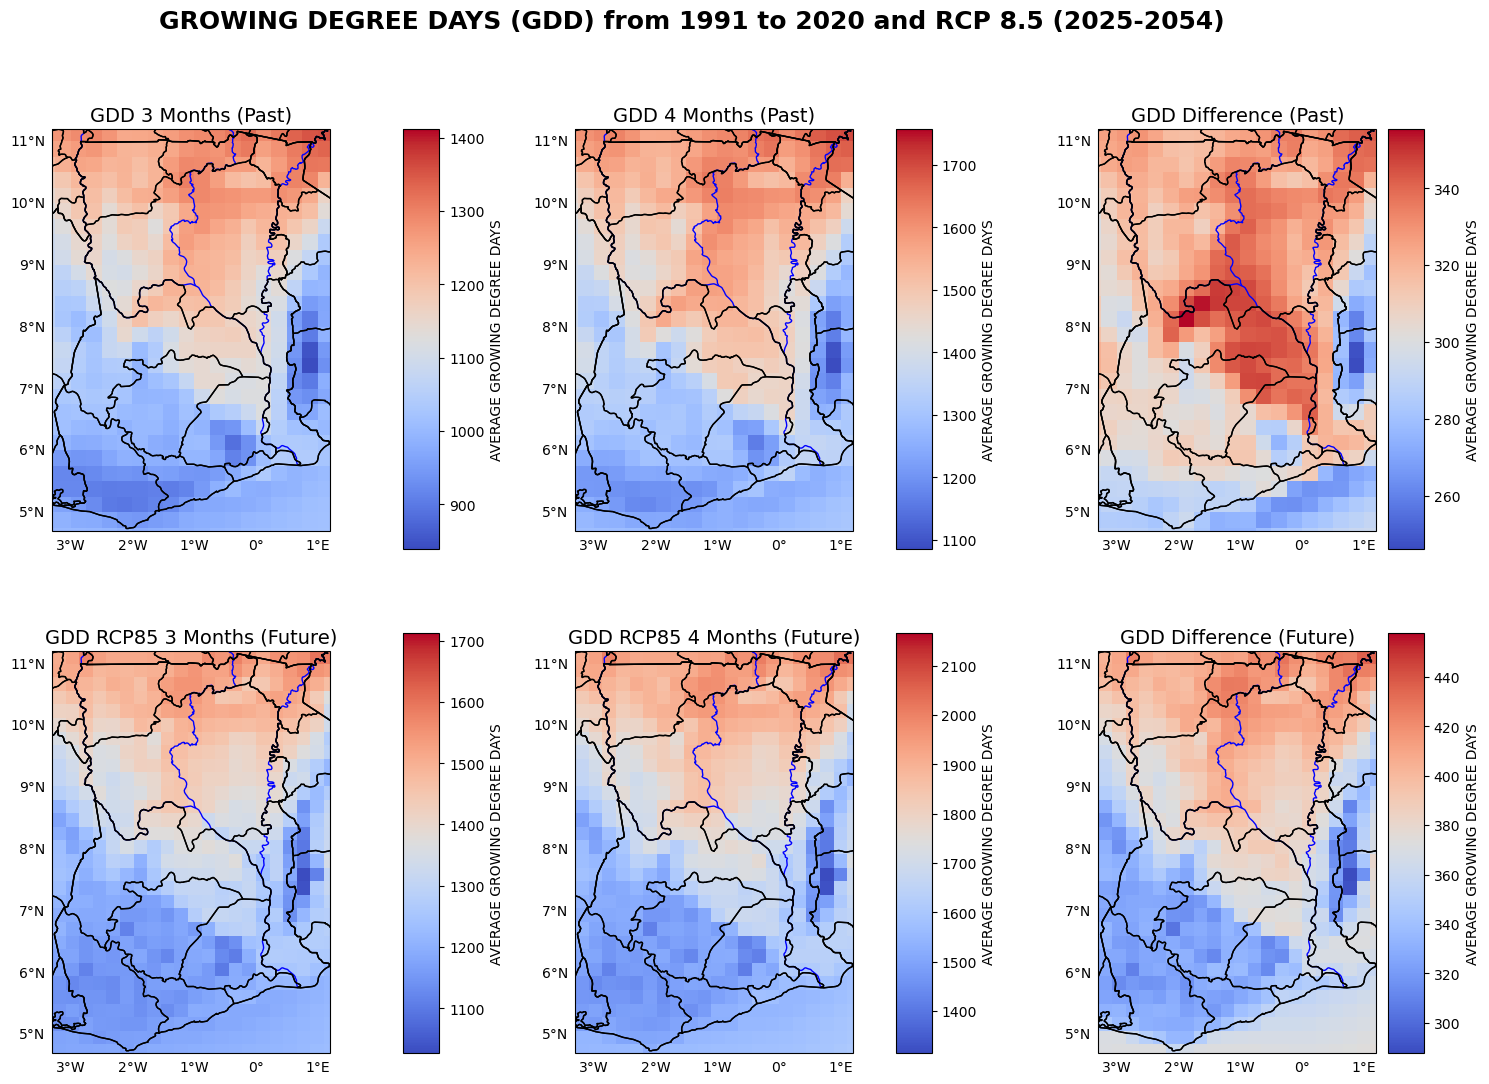

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
titles = ['GDD 3 Months (Past)','GDD 4 Months (Past)',
    'GDD Difference (Past)',
    'GDD RCP85 3 Months (Future)',
    'GDD RCP85 4 Months (Future)',
    'GDD Difference (Future)']
data_list = [GDD_mean_over_the_30_years_3_months,GDD_mean_over_the_30_years_4_months,GDD_difference_past,GDD_mean_over_the_30_years_RCP85_3_months,
    GDD_mean_over_the_30_years_RCP85_4_months,
    GDD_difference_future]

future_coordinates = ['rlon', 'rlat']

for ax, data, title in zip(axs.flat, data_list, titles):
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS, color='black')
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.RIVERS, color='b')
    ax.add_feature(cf.STATES)
    ax.add_feature(cf.OCEAN)
    ax.set_extent([-3.3, 1.2, 11.2, 4.7])
    
    if 'rlon' in data.coords: 
        cs = ax.pcolormesh(
            data['rlon'], 
            data['rlat'], 
            data, 
            cmap='coolwarm', 
            transform=ccrs.PlateCarree())
    else:  
        cs = ax.pcolormesh(data['longitude'], data['latitude'], data, cmap='coolwarm', transform=ccrs.PlateCarree())

    gridlines = ax.gridlines(draw_labels=True, 
                            linestyle='--', 
                            color='gray', 
                            alpha=0)
    gridlines.top_labels = False
    gridlines.right_labels = False
    gridlines.xlabel_style = {'size': 10, 'color': 'black'}
    gridlines.ylabel_style = {'size': 10, 'color': 'black'}
    cbar_ax = fig.add_axes([ax.get_position().x1 + 0.02, ax.get_position().y0, 0.02, ax.get_position().height])
    fig.colorbar(cs, cax=cbar_ax, orientation='vertical', label='AVERAGE GROWING DEGREE DAYS')
    ax.set_title(title, fontsize=14)

plt.subplots_adjust(wspace=0.5, hspace=0.3)
fig.suptitle('GROWING DEGREE DAYS (GDD) from 1991 to 2020 and RCP 8.5 (2025-2054)', fontsize=18, color='black', fontweight='bold')